Index(['SURFACE_HA', 'TYPE_SOL', 'ENGRAIS_KG_HA', 'PRECIPITATIONS_MM',
       'TEMPERATURE_C', 'RENDEMENT_T_HA'],
      dtype='object')
Moyenne du rendement : 7.378418687218944
Médiane du rendement : 7.349138167259971
Mode du rendement : 3.000276469608442
Écart-type du rendement : 2.569990985326707
Variance du rendement : 6.6048536646605385
Étendue du rendement : 8.995742859645505


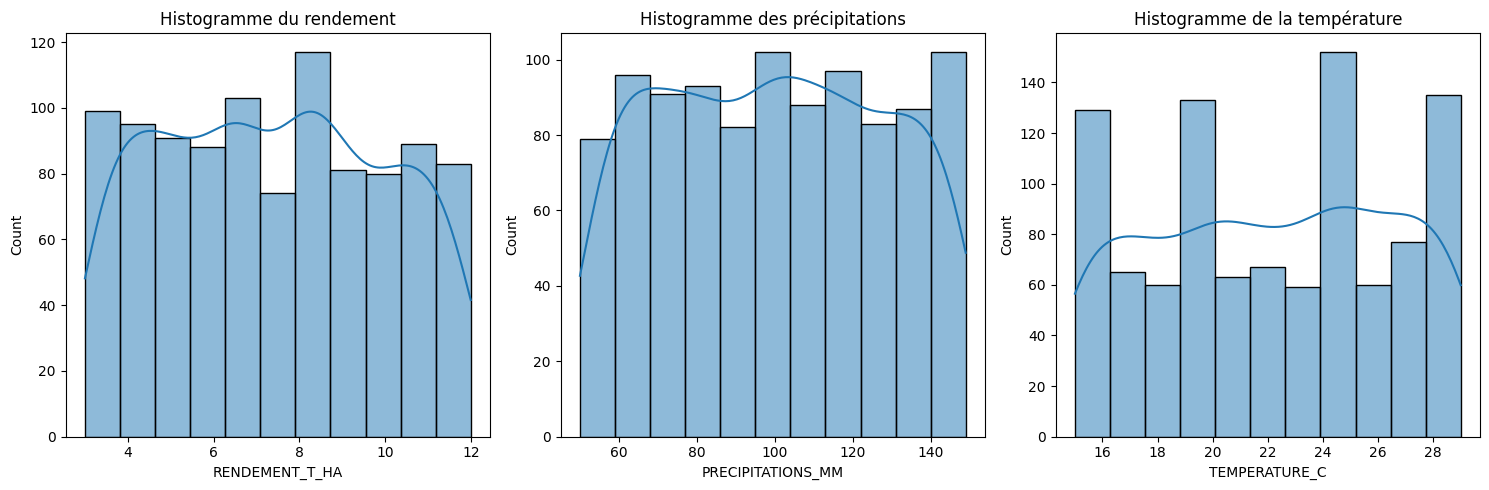

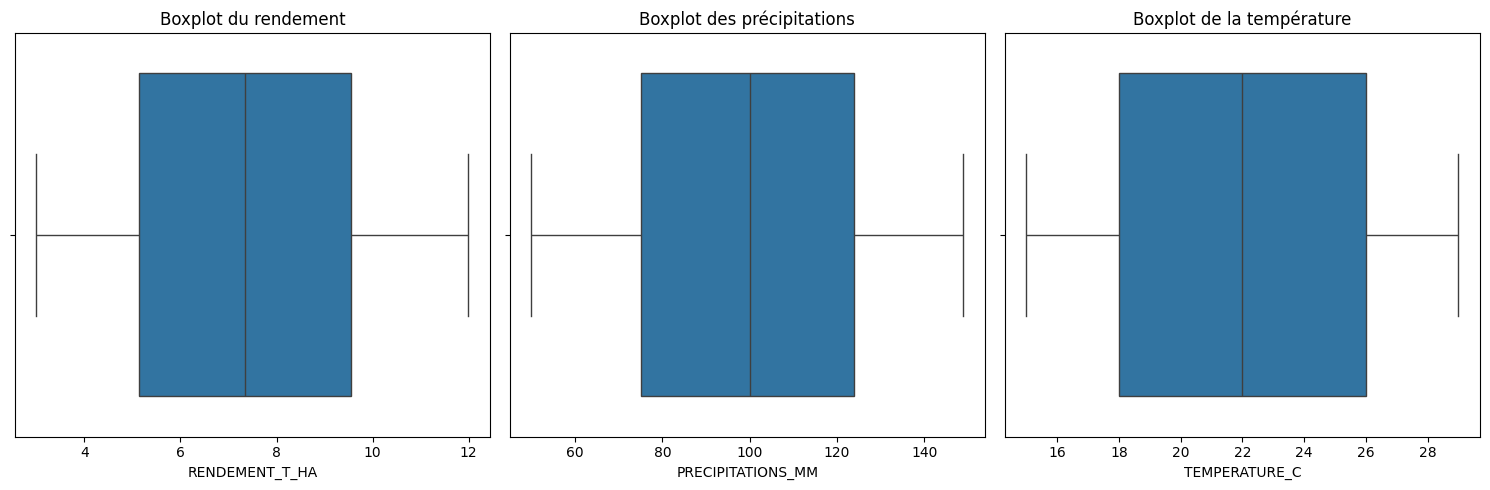

   TYPE_SOL
0         3
1         3
2         3
3         1
4         2


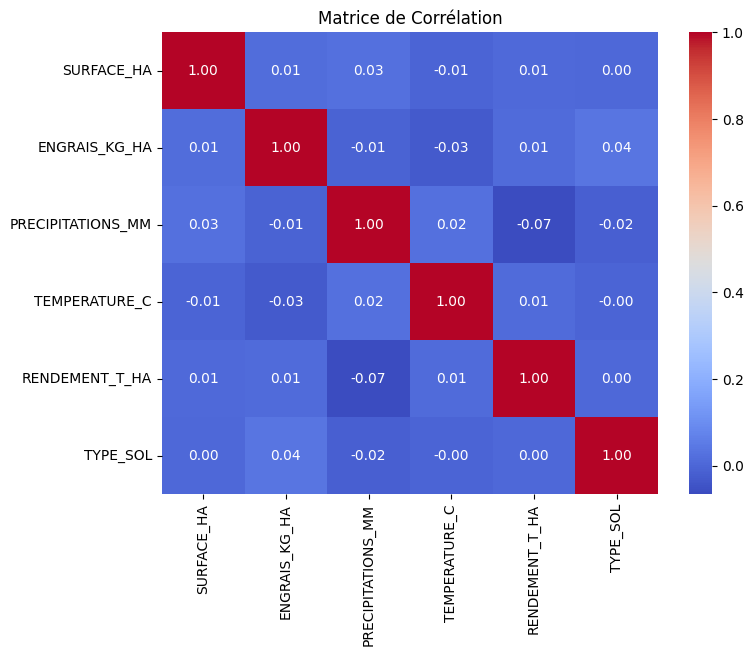

Valeur de la statistique F : 1.3560517305539426
P-value : 0.2581509831874908
H0 non rejetée : Le type de sol n'a pas d'influence significative sur le rendement.
Régression Linéaire : MAE = 2.06407924353965, RMSE = 2.4263415038706455, R² = 0.0017138549149774418
Forêt Aléatoire : MAE = 2.0975983935377207, RMSE = 2.5655755836235428, R² = -0.11614551136959705
Gradient Boosting : MAE = 2.1122140010346873, RMSE = 2.5329143870095856, R² = -0.08790810194859566
SVR : MAE = 2.2375792822118745, RMSE = 2.692342773983105, R² = -0.22916982871140767
XGBoost : MAE = 2.2501487640824647, RMSE = 2.7171503197151705, R² = -0.2519256000326402


c:\Users\babou\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\babou\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\babou\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\babou\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarnin

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import xgboost as xgb

# Chargement des données
url = r'C:\Users\babou\Desktop\M1_OIVM\ATDN\S2\TP\rendement_mais.csv'
data = pd.read_csv(url)
print(data.columns)

# ETAPE 2
# 2.1 Mesures de tendance centrale
mean_rendement = data['RENDEMENT_T_HA'].mean()
median_rendement = data['RENDEMENT_T_HA'].median()
mode_rendement = data['RENDEMENT_T_HA'].mode()[0]

print(f'Moyenne du rendement : {mean_rendement}')
print(f'Médiane du rendement : {median_rendement}')
print(f'Mode du rendement : {mode_rendement}')

# 2.2 Mesures de dispersion
std_rendement = data['RENDEMENT_T_HA'].std()
variance_rendement = data['RENDEMENT_T_HA'].var()
range_rendement = data['RENDEMENT_T_HA'].max() - data['RENDEMENT_T_HA'].min()

print(f'Écart-type du rendement : {std_rendement}')
print(f'Variance du rendement : {variance_rendement}')
print(f'Étendue du rendement : {range_rendement}')

# 2.3 Visualisation des données
# Histogrammes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['RENDEMENT_T_HA'], kde=True)
plt.title('Histogramme du rendement')

plt.subplot(1, 3, 2)
sns.histplot(data['PRECIPITATIONS_MM'], kde=True)
plt.title('Histogramme des précipitations')

plt.subplot(1, 3, 3)
sns.histplot(data['TEMPERATURE_C'], kde=True)
plt.title('Histogramme de la température')

plt.tight_layout()
plt.show()

# Boxplots pour identifier les outliers
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=data['RENDEMENT_T_HA'])
plt.title('Boxplot du rendement')

plt.subplot(1, 3, 2)
sns.boxplot(x=data['PRECIPITATIONS_MM'])
plt.title('Boxplot des précipitations')

plt.subplot(1, 3, 3)
sns.boxplot(x=data['TEMPERATURE_C'])
plt.title('Boxplot de la température')

plt.tight_layout()
plt.show()

# Dictionnaire de conversion pour les types de sol
mapping_sol = {'Argileux': 1, 'Sableux': 2, 'Limoneux': 3}

# Remplacement des valeurs textuelles par des valeurs numériques
data['TYPE_SOL'] = data['TYPE_SOL'].map(mapping_sol)

# On vérifie si la conversion a bien fonctionné
print(data[['TYPE_SOL']].head())

# 2.4 Matrice de corrélation
corr_matrix = data[['SURFACE_HA', 'ENGRAIS_KG_HA', 'PRECIPITATIONS_MM', 'TEMPERATURE_C', 'RENDEMENT_T_HA', 'TYPE_SOL']].corr()


# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matrice de Corrélation')
plt.show()


# ETAPE 3
# 3.1 Préparation des données pour l'ANOVA
# Regroupement les rendements par type de sol
grouped_by_soil = [data[data['TYPE_SOL'] == sol]['RENDEMENT_T_HA'] for sol in data['TYPE_SOL'].unique()]

# 3.2 Test ANOVA
f_stat, p_value = stats.f_oneway(*grouped_by_soil)

print(f'Valeur de la statistique F : {f_stat}')
print(f'P-value : {p_value}')

# Interprétation de la p-value
alpha = 0.05  # Seuil de signification

if p_value < alpha:
    print("H0 rejetée : Le type de sol influence significativement le rendement.")
else:
    print("H0 non rejetée : Le type de sol n'a pas d'influence significative sur le rendement.")


# ETAPE 4 : Prétraitement & Modélisation
# 4.1 Séparation des données en train et test
X = data[['SURFACE_HA', 'ENGRAIS_KG_HA', 'PRECIPITATIONS_MM', 'TEMPERATURE_C']]
y = data['RENDEMENT_T_HA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.2 Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4.3 Création des modèles
# Régression Linéaire
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Forêt Aléatoire
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Support Vector Regression (SVR)
svr_model = SVR(kernel='rbf', C=100, gamma=0.1)
svr_model.fit(X_train_scaled, y_train)

# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)


# 4.4 Prédictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_svr = svr_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 4.5 Évaluation des modèles
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Régression Linéaire
mae_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)

# Forêt Aléatoire
mae_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

# Gradient Boosting
mae_gb, rmse_gb, r2_gb = evaluate_model(y_test, y_pred_gb)

# Support Vector Regression (SVR)
mae_svr, rmse_svr, r2_svr = evaluate_model(y_test, y_pred_svr)

# XGBoost
mae_xgb, rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)

# Affichage des résultats
print(f"Régression Linéaire : MAE = {mae_lr}, RMSE = {rmse_lr}, R² = {r2_lr}")
print(f"Forêt Aléatoire : MAE = {mae_rf}, RMSE = {rmse_rf}, R² = {r2_rf}")
print(f"Gradient Boosting : MAE = {mae_gb}, RMSE = {rmse_gb}, R² = {r2_gb}")
print(f"SVR : MAE = {mae_svr}, RMSE = {rmse_svr}, R² = {r2_svr}")
print(f"XGBoost : MAE = {mae_xgb}, RMSE = {rmse_xgb}, R² = {r2_xgb}")
